### importing necessary libraries

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8)#adjust the configuration of the plot we will create

#read the data
movies_data=pd.read_csv("movies.csv")
movies_data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
#see if there is missing value 
for col in movies_data.columns:
    percent_missing=np.mean(movies_data[col].isnull())
    print(f'{col}-{percent_missing}%')



name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [10]:
#removing the null

movies_data=movies_data.dropna()
movies_data.isnull()
movies_data.head()
movies_data.tail()

name     rating      genre  year  \
7648     Bad Boys for Life          R     Action  2020   
7649    Sonic the Hedgehog         PG     Action  2020   
7650              Dolittle         PG  Adventure  2020   
7651  The Call of the Wild         PG  Adventure  2020   
7652     The Eight Hundred  Not Rated     Action  2020   

                               released  score     votes        director  \
7648   January 17, 2020 (United States)    6.6  140000.0    Adil El Arbi   
7649  February 14, 2020 (United States)    6.5  102000.0     Jeff Fowler   
7650   January 17, 2020 (United States)    5.6   53000.0  Stephen Gaghan   
7651  February 21, 2020 (United States)    6.8   42000.0   Chris Sanders   
7652    August 28, 2020 (United States)    6.8    3700.0         Hu Guan   

              writer               star        country       budget  \
7648     Peter Craig         Will Smith  United States   90000000.0   
7649       Pat Casey       Ben Schwartz  United States   85000000.0   
7650  Stephen Gaghan  Robert Downey Jr.  United States  175000000.0   
7651   Michael Green      Harrison Ford         Canada  135000000.0   
7652         Hu Guan    Zhi-zhong Huang          China   80000000.0   

            gross                              company  runtime  
7648  426505244.0                    Columbia Pictures    124.0  
7649  319715683.0                   Paramount Pictures     99.0  
7650  245487753.0                   Universal Pictures    101.0  
7651  111105497.0                 20th Century Studios    100.0  
7652  461421559.0  Beijing Diqi Yinxiang Entertainment    149.0

In [14]:
#data type for our dataframe
movies_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [74]:
#chage data type of the columns
movies_data['budget']=movies_data['budget'].astype(int)
movies_data['gross']=movies_data['gross'].astype(int)
movies_data['year']=movies_data['year'].astype(int)
movies_data['runtime']=movies_data['runtime'].astype(int)
movies_data['corrected_year']=movies_data['corrected_year'].astype(int)
movies_data['score']=movies_data['score'].astype(int)
movies_data['votes']=movies_data['votes'].astype(int)


In [17]:
movies_data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [23]:
#create corrected year column 
movies_data['corrected_year']=movies_data['released'].str.extract(pat = '([0-9]{4})').astype(int)
pd.set_option('display.max_rows',None)

In [44]:
movies_data=movies_data.sort_values(by=['gross'],inplace=False , ascending=False)

In [45]:
#removing duplicates
#movies_data['company']=movies_data['company'].drop_duplicates().sort_values(ascending=False)
movies_data.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

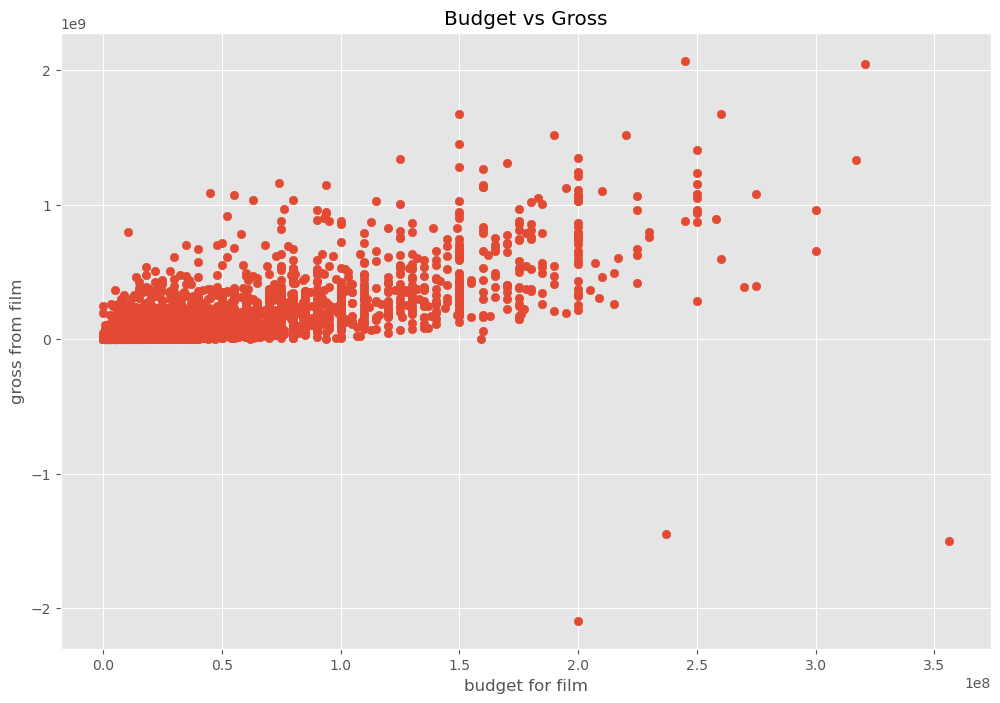

In [54]:
#Finding correlation 
#with budget and compnay is high correlation 
plt.scatter(x=movies_data['budget'],y=movies_data['gross'])
plt.title("Budget vs Gross")
plt.xlabel('budget for film')
plt.ylabel('gross from film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

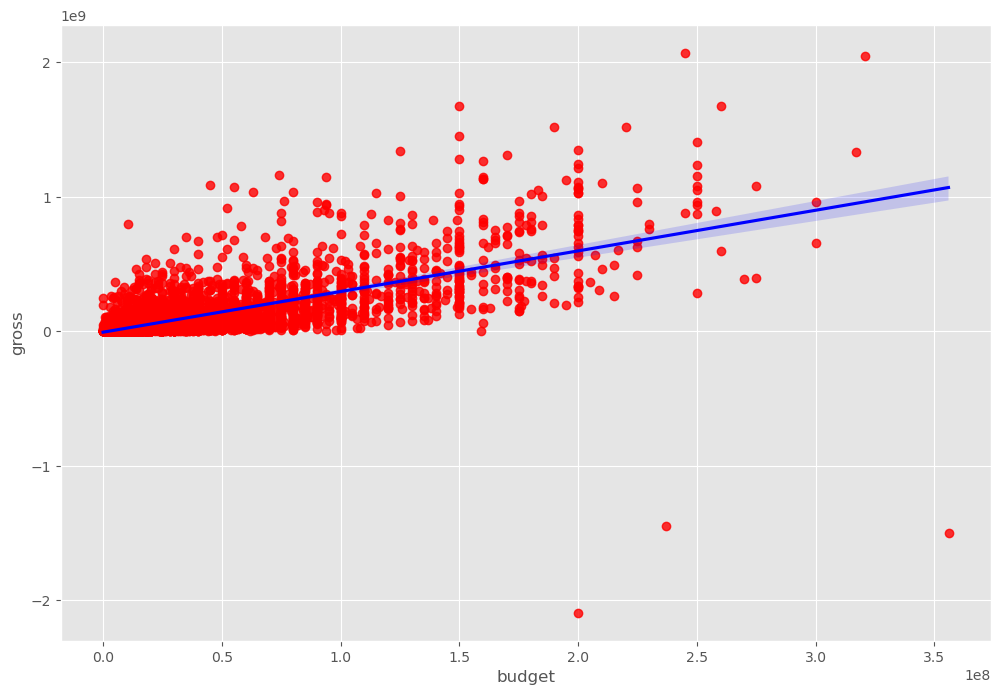

In [55]:
#further knowing the correlation 
sns.regplot(x='budget',y='gross',data=movies_data,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [56]:
movies_data.dtypes

name              object
rating            object
genre             object
year               int32
released          object
score              int32
votes              int32
director          object
writer            object
star              object
country           object
budget             int32
gross              int32
company           object
runtime            int32
corrected_year     int32
dtype: object

In [66]:
#correlation with pearson 

movies_data_numeric=movies_data.select_dtypes(include=[int])
correlation_matrix=movies_data_numeric.corr(method='pearson')
correlation_matrix

year     score     votes    budget     gross   runtime  \
year            1.000000  0.057013  0.206021  0.327722  0.273147  0.075077   
score           0.057013  1.000000  0.455808  0.066443  0.199511  0.394589   
votes           0.206021  0.455808  1.000000  0.439675  0.565687  0.352303   
budget          0.327722  0.066443  0.439675  1.000000  0.687813  0.318695   
gross           0.273147  0.199511  0.565687  0.687813  1.000000  0.231985   
runtime         0.075077  0.394589  0.352303  0.318695  0.231985  1.000000   
corrected_year  0.998726  0.062234  0.203098  0.320312  0.267599  0.075294   

                corrected_year  
year                  0.998726  
score                 0.062234  
votes                 0.203098  
budget                0.320312  
gross                 0.267599  
runtime               0.075294  
corrected_year        1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

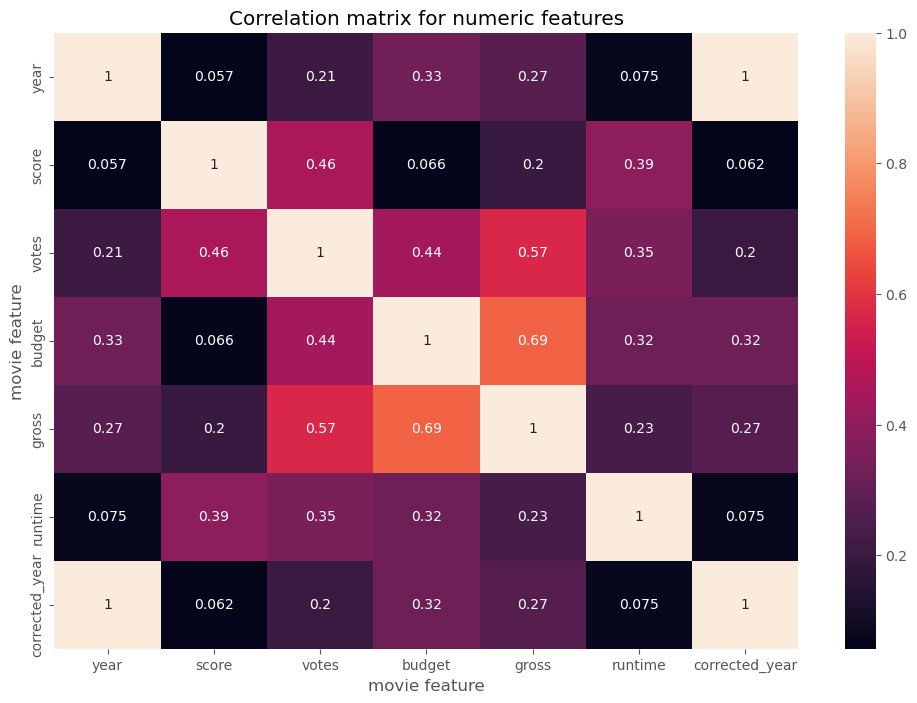

In [71]:

correlation_matrix=movies_data_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix for numeric features")
plt.xlabel("movie feature")
plt.ylabel("movie feature")
plt.show

In [61]:
#correlation with kendall
movies_data_numeric.corr(method='kendall')

year     score     votes    budget     gross   runtime  \
year            1.000000  0.044956  0.296512  0.220833  0.238737  0.064824   
score           0.044956  1.000000  0.369110 -0.006778  0.133004  0.307368   
votes           0.296512  0.369110  1.000000  0.346274  0.551440  0.205344   
budget          0.220833 -0.006778  0.346274  1.000000  0.509844  0.231278   
gross           0.238737  0.133004  0.551440  0.509844  1.000000  0.174775   
runtime         0.064824  0.307368  0.205344  0.231278  0.174775  1.000000   
corrected_year  0.991304  0.049091  0.293044  0.213719  0.231587  0.064793   

                corrected_year  
year                  0.991304  
score                 0.049091  
votes                 0.293044  
budget                0.213719  
gross                 0.231587  
runtime               0.064793  
corrected_year        1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

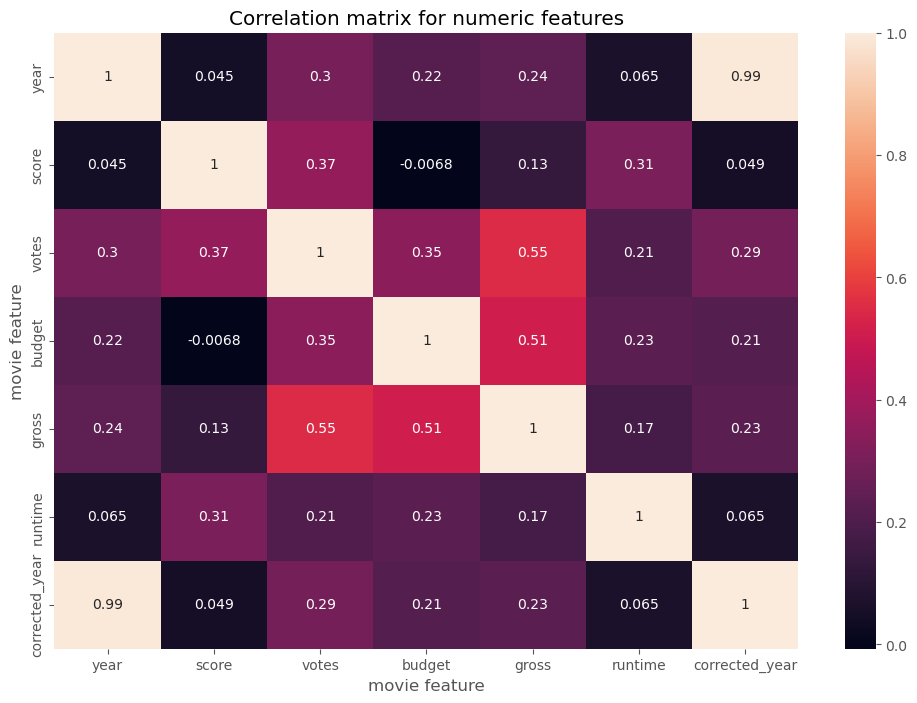

In [70]:

correlation_matrix=movies_data_numeric.corr(method='kendall')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix for numeric features")
plt.xlabel("movie feature")
plt.ylabel("movie feature")
plt.show

In [68]:
#correlation with spearman
movies_data_numeric.corr(method='spearman')

year     score     votes    budget     gross   runtime  \
year            1.000000  0.059407  0.427623  0.312886  0.349858  0.095444   
score           0.059407  1.000000  0.474519 -0.009156  0.175641  0.393549   
votes           0.427623  0.474519  1.000000  0.493461  0.742522  0.300621   
budget          0.312886 -0.009156  0.493461  1.000000  0.689669  0.330794   
gross           0.349858  0.175641  0.742522  0.689669  1.000000  0.254124   
runtime         0.095444  0.393549  0.300621  0.330794  0.254124  1.000000   
corrected_year  0.998694  0.064899  0.422988  0.302535  0.339366  0.095507   

                corrected_year  
year                  0.998694  
score                 0.064899  
votes                 0.422988  
budget                0.302535  
gross                 0.339366  
runtime               0.095507  
corrected_year        1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

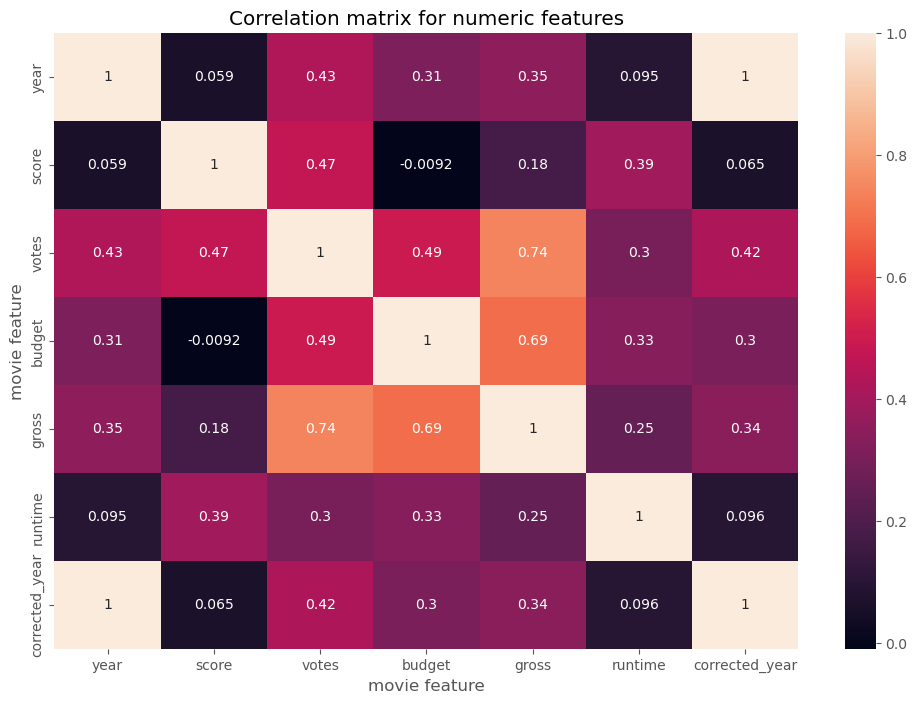

In [69]:
correlation_matrix=movies_data_numeric.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix for numeric features")
plt.xlabel("movie feature")
plt.ylabel("movie feature")
plt.show

In [79]:
#looks at compnay 
#numerizing all the columns in data
numerized_data=movies_data
for col_names in numerized_data.columns:
    if(numerized_data[col_names].dtype=='object'):
        numerized_data[col_names]=numerized_data[col_names].astype('category')
        numerized_data[col_names]=numerized_data[col_names].cat.codes
    
numerized_data.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527      7  1100000       785    1263   
7445   388       5      0  2019       137      8   903000       105     513   
3045  4909       5      6  1997       534      7  1100000       785    1263   
6663  3643       5      0  2015       529      7   876000       768    1806   
7244   389       5      0  2018       145      8   897000       105     513   

      star  country     budget       gross  company  runtime  corrected_year  
5445  1534       47  237000000 -1447721093       -1      162            2009  
7445  1470       47  356000000 -1497465968       -1      181            2019  
3045  1073       47  200000000 -2093320032       -1      194            1997  
6663   356       47  245000000  2069521700       -1      138            2015  
7244  1470       47  321000000  2048359754       -1      149            2018

<function matplotlib.pyplot.show(close=None, block=None)>

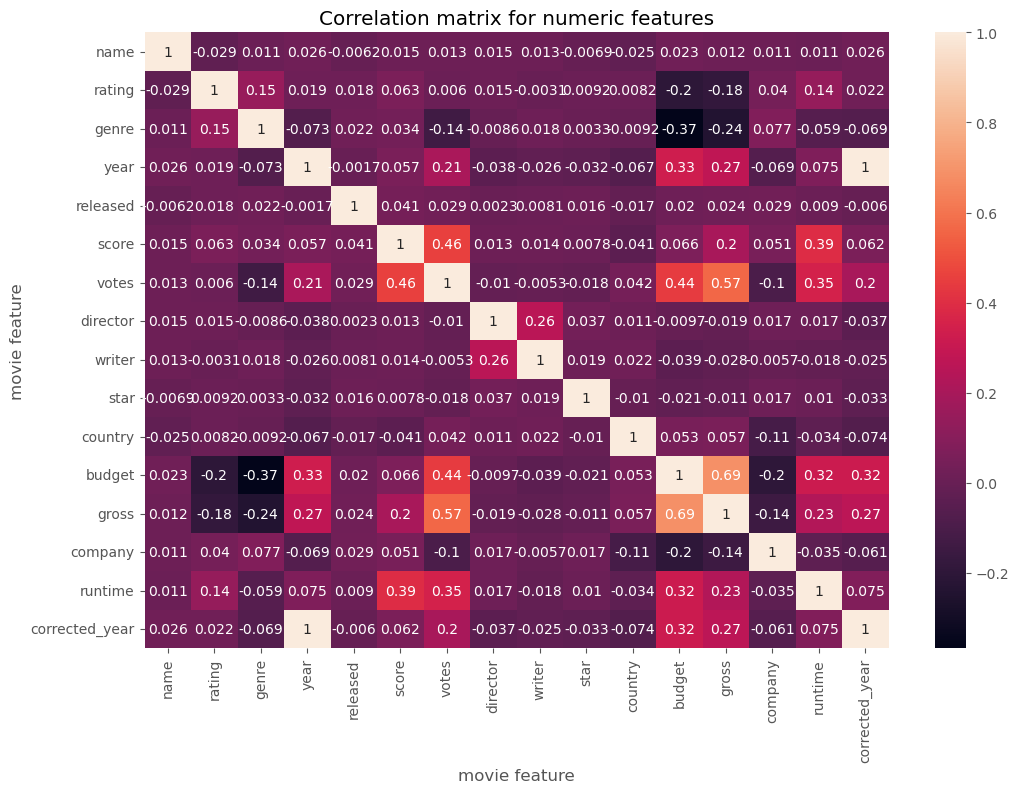

In [90]:
correlation_matrix=numerized_data.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix for numeric features")
plt.xlabel("movie feature")
plt.ylabel("movie feature")
plt.show

In [91]:
correlated_all_data=numerized_data.corr()


In [92]:
#to see the correlation easily
easy_corr=correlated_all_data.unstack()
easy_corr

name            name              1.000000
                rating           -0.029234
                genre             0.010996
                year              0.025542
                released         -0.006152
                score             0.015473
                votes             0.012615
                director          0.015246
                writer            0.012880
                star             -0.006882
                country          -0.025490
                budget            0.023392
                gross             0.012338
                company           0.011370
                runtime           0.010850
                corrected_year    0.025542
rating          name             -0.029234
                rating            1.000000
                genre             0.147796
                year              0.019499
                released          0.018083
                score             0.063464
                votes             0.006031
           

In [93]:
sorted_paired=easy_corr.sort_values()
sorted_paired

genre           budget           -0.368523
budget          genre            -0.368523
genre           gross            -0.243836
gross           genre            -0.243836
budget          rating           -0.203946
rating          budget           -0.203946
company         budget           -0.197893
budget          company          -0.197893
rating          gross            -0.183790
gross           rating           -0.183790
company         gross            -0.144898
gross           company          -0.144898
votes           genre            -0.135990
genre           votes            -0.135990
country         company          -0.114793
company         country          -0.114793
                votes            -0.099914
votes           company          -0.099914
country         corrected_year   -0.073569
corrected_year  country          -0.073569
year            genre            -0.073167
genre           year             -0.073167
                corrected_year   -0.069147
corrected_y

In [95]:
high_correlation=sorted_paired[(sorted_paired)>0.5 ]
high_correlation

gross           votes             0.565687
votes           gross             0.565687
budget          gross             0.687813
gross           budget            0.687813
year            corrected_year    0.998726
corrected_year  year              0.998726
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

### votes and budget have high correlation to gross earnings